In [1]:
# Initial data colllection starts
#Import all necessary packages

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import re
import os
from google.colab import drive
drive.mount('/content/drive/')
#To Change my directory


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [2]:
os.chdir("drive/MyDrive/data")
os.listdir()

['cache',
 'masked_wordcloud.jpg',
 'output.html',
 'model.joblib',
 'scaler.joblib',
 'roseman',
 'AMHARIC',
 'AdSmartABdata.csv',
 'rossmann-store-sales.zip']

**Overview of data**

In [3]:
data = pd.read_csv('AdSmartABdata.csv')
data.head()

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
0,0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,2020-07-10,8,Generic Smartphone,6,Chrome Mobile,0,0
1,000eabc5-17ce-4137-8efe-44734d914446,exposed,2020-07-07,10,Generic Smartphone,6,Chrome Mobile,0,0
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1
3,00187412-2932-4542-a8ef-3633901c98d9,control,2020-07-03,15,Samsung SM-A705FN,6,Facebook,0,0
4,001a7785-d3fe-4e11-a344-c8735acacc2c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0


In [5]:
data.size

72693

In [7]:
data.shape

(8077, 9)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8077 entries, 0 to 8076
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   auction_id   8077 non-null   object
 1   experiment   8077 non-null   object
 2   date         8077 non-null   object
 3   hour         8077 non-null   int64 
 4   device_make  8077 non-null   object
 5   platform_os  8077 non-null   int64 
 6   browser      8077 non-null   object
 7   yes          8077 non-null   int64 
 8   no           8077 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 568.0+ KB


In [9]:
data.describe()

,hour,platform_os,yes,no
count,8077.000000,8077.000000,8077.000000,8077.000000
mean,11.615080,5.947134,0.070818,0.083075
std,5.734879,0.224333,0.256537,0.276013
min,0.000000,5.000000,0.000000,0.000000
25%,7.000000,6.000000,0.000000,0.000000
50%,13.000000,6.000000,0.000000,0.000000
75%,15.000000,6.000000,0.000000,0.000000
max,23.000000,7.000000,1.000000,1.000000


In [12]:
#Duplicate calculate
def duplicate_calculator(df):
  dups = df.duplicated()
  # report if there are any duplicates
  
  return print(dups.any())

In [13]:
duplicate_calculator(data)

False


In [24]:
def missing_value_identifier(df):
  print("The number of missing value(s): {}".format(df.isnull().sum().sum()))
  
  print("Columons having columns value:{}".format(df.columns[df.isnull().any()]))

 

In [25]:
missing_value_identifier(data)

The number of missing value(s): 0
Columons having columns value:Index([], dtype='object')


**Univariat Analyisis **

In [28]:
#unique value count for each Auction Identifier 
Unique_auction_id= data['auction_id'].nunique()
print("Unique user identifier",Unique_auction_id)

Unique user identifier 8077


**Information about experiment **

In [29]:
#value count for each experiment
experiment_count=data['experiment'].value_counts()
experiment_count

control    4071
exposed    4006
Name: experiment, dtype: int64

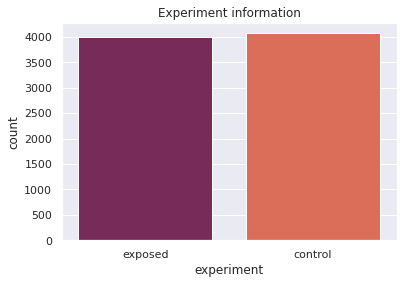

In [54]:
sns.set_theme(style="darkgrid")
ax = plt.axes()
sns.countplot(data=data,x='experiment',palette="rocket")
ax.set_title("Experiment information")

plt.show()

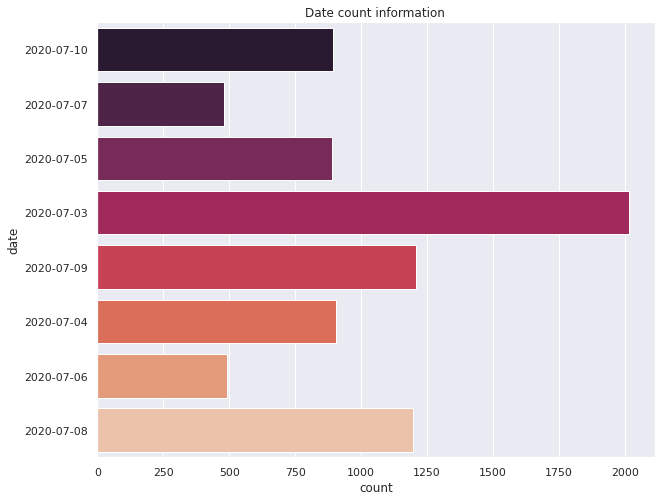

In [53]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(10,8))
ax = plt.axes()
sns.countplot(data=data,y='date',palette="rocket")
ax.set_title("Date count information ")

plt.show()


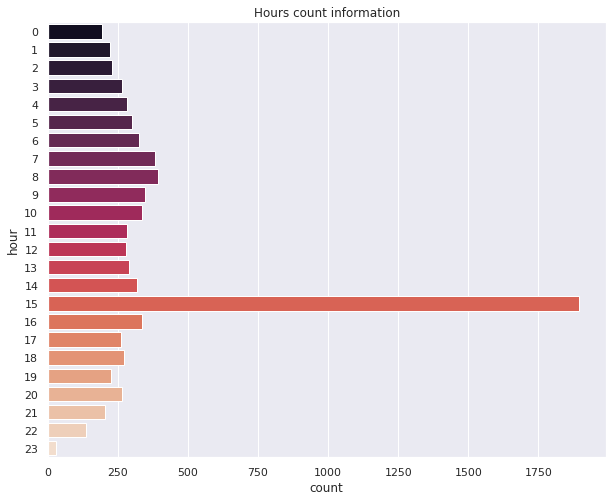

In [52]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(10,8))
ax = plt.axes()
sns.countplot(data=data,y='hour',palette="rocket")
ax.set_title("Hours count information")

plt.show()

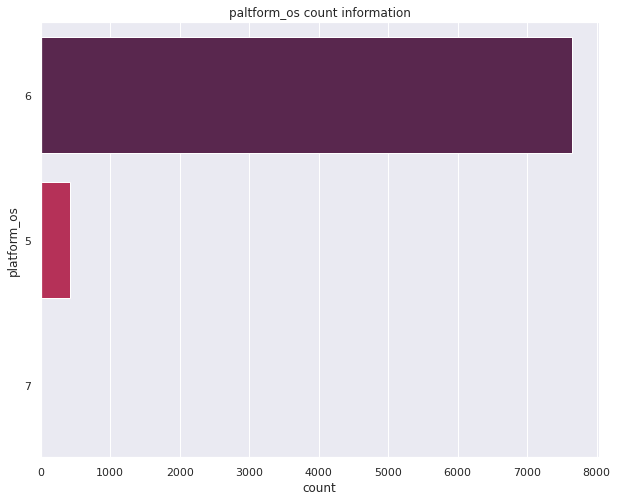

In [50]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(10,8))
ax = plt.axes()
sns.countplot(data=data,y='platform_os',order=data['platform_os'].value_counts().iloc[:5].index,palette="rocket")
ax.set_title("paltform_os count information")

plt.show()

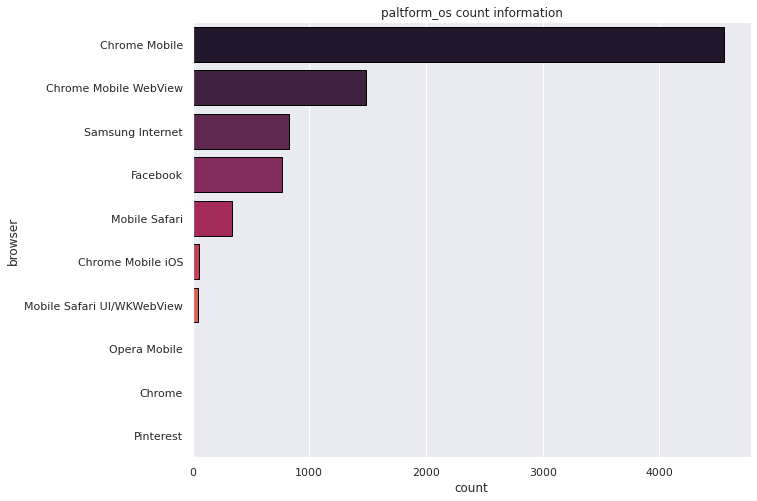

In [47]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(10,8))
ax = plt.axes()
sns.countplot(data=data,y='browser',order=data['browser'].value_counts().iloc[:10].index,palette="rocket",edgecolor=(0,0,0))
ax.set_title("paltform_os count information")

plt.show()

**Bivariate Anlyisis **

Text(0.5, 1.0, 'Experiment and yes count information')

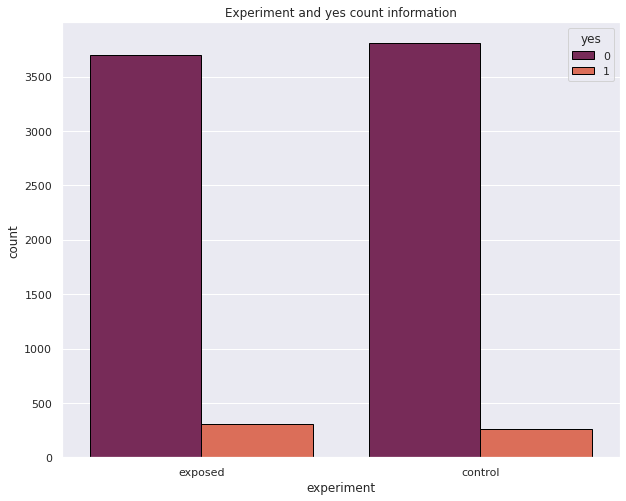

In [57]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(10,8))
ax = plt.axes()
sns.countplot(data=data,x='experiment',hue='yes',palette="rocket",edgecolor=(0,0,0))
ax.set_title("Experiment and yes count information")

Text(0.5, 1.0, 'Experiment and no count information')

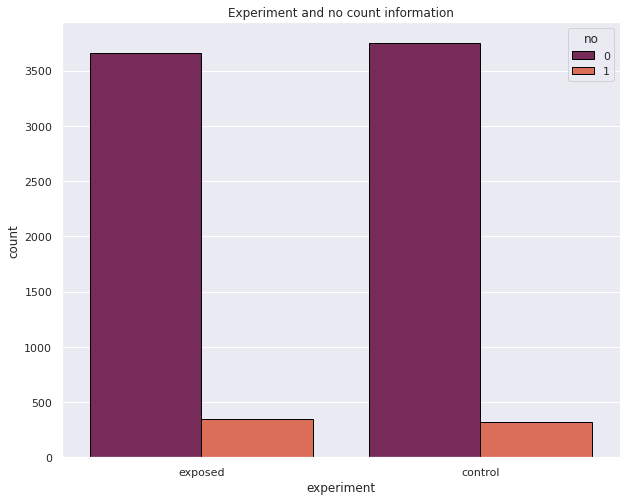

In [58]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(10,8))
ax = plt.axes()
sns.countplot(data=data,x='experiment',hue='no',palette="rocket",edgecolor=(0,0,0))
ax.set_title("Experiment and no count information")

Text(0.5, 1.0, 'Experiment and yes count information')

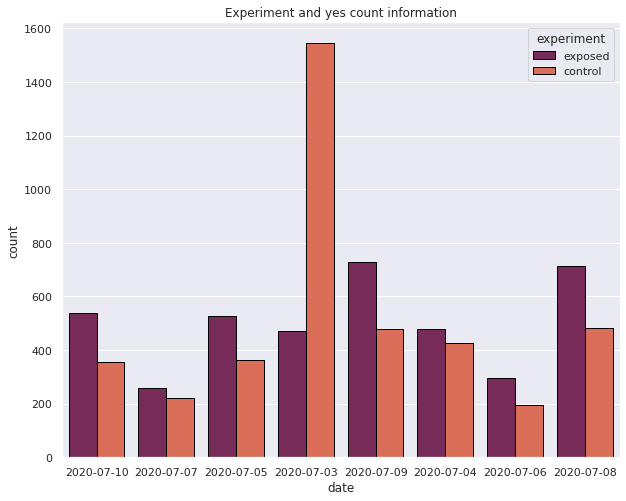

In [60]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(10,8))
ax = plt.axes()
sns.countplot(data=data,x='date',hue='experiment',palette="rocket",edgecolor=(0,0,0))
ax.set_title("Experiment and yes count information")

Text(0.5, 1.0, 'Correlation between variables')

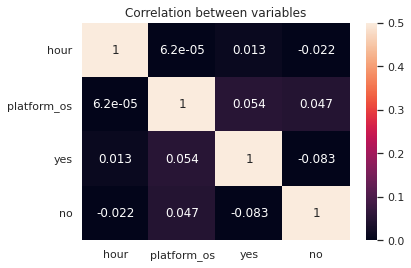

In [64]:
#variables corelation 
variables_correlation= data.corr()
ax = plt.axes()
sns.heatmap(variables_correlation, vmin=0, vmax=0.5, annot=True)
ax.set_title("Correlation between variables")

The correlation matics shows as there is no significat correlation between variables in the given dataset.

Statistical AB testing 

Selecting data having value 1 for yes and no column

Processing data to feed to machine learning model

In [101]:
from sklearn.model_selection import KFold, cross_val_score,train_test_split
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import log_loss
from sklearn.preprocessing import MinMaxScaler

In [66]:
awarness_inx=((data['yes']==1) | (data['no']==1))

In [72]:
awarness_df=data[awarness_inx].copy()
awarness_df.reset_index(drop=True, inplace=True)
awarness_df= awarness_df[awarness_df.columns[:-1]].copy()
awarness_df.rename(columns={'yes':'awarness'}, inplace=True)
awarness_df.head()

,auction_id,experiment,date,hour,device_make,platform_os,browser,awarness
0,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0
1,008aafdf-deef-4482-8fec-d98e3da054da,exposed,2020-07-04,16,Generic Smartphone,6,Chrome Mobile,1
2,00a1384a-5118-4d1b-925b-6cdada50318d,exposed,2020-07-06,8,Generic Smartphone,6,Chrome Mobile,0
3,00b6fadb-10bd-49e3-a778-290da82f7a8d,control,2020-07-08,4,Samsung SM-A202F,6,Facebook,1
4,00ebf4a8-060f-4b99-93ac-c62724399483,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0


In [73]:
#dropping colums which are not imformative 
del awarness_df['auction_id']

In [76]:
awarness_df['date']=pd.to_datetime(awarness_df['date'])
awarness_df['day']=awarness_df['date'].dt.day_name()
del awarness_df['date']
awarness_df.head()

,experiment,hour,device_make,platform_os,browser,awarness,day
0,exposed,2,E5823,6,Chrome Mobile WebView,0,Sunday
1,exposed,16,Generic Smartphone,6,Chrome Mobile,1,Saturday
2,exposed,8,Generic Smartphone,6,Chrome Mobile,0,Monday
3,control,4,Samsung SM-A202F,6,Facebook,1,Wednesday
4,control,15,Generic Smartphone,6,Chrome Mobile,0,Friday


In [78]:


encoder = preprocessing.LabelEncoder()
awarness_df['experiment']=encoder.fit_transform(awarness_df['experiment'])
awarness_df['device_make']=encoder.fit_transform(awarness_df['device_make'])
awarness_df['browser']=encoder.fit_transform(awarness_df['browser'])
awarness_df['day']=encoder.fit_transform(awarness_df['day'])
awarness_df.head()


,experiment,hour,device_make,platform_os,browser,awarness,day
0,1,2,4,6,2,0,3
1,1,16,13,6,1,1,2
2,1,8,13,6,1,0,1
3,0,4,43,6,4,1,6
4,0,15,13,6,1,0,0


Text(0.5, 1.0, 'Correlation between variables')

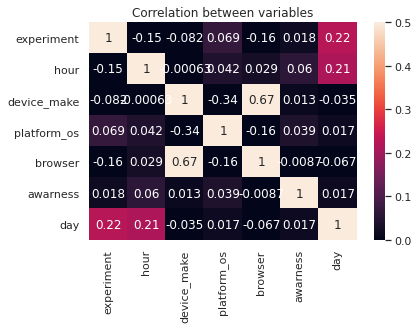

In [79]:
#variables corelation 
awarness_correlation= awarness_df.corr()
ax = plt.axes()
sns.heatmap(awarness_correlation, vmin=0, vmax=0.5, annot=True)
ax.set_title("Correlation between variables")

From this correlation map variables browser and device make are highly correlated we can drop either of them.




In [80]:
del awarness_df['device_make']


In [85]:
awarness_df.head()

,experiment,hour,platform_os,browser,awarness,day
0,1,2,6,2,0,3
1,1,16,6,1,1,2
2,1,8,6,1,0,1
3,0,4,6,4,1,6
4,0,15,6,1,0,0


In [88]:

scaler = MinMaxScaler()
scaled_data=pd.DataFrame(scaler.fit_transform(awarness_df),columns=('experiment','hour','platform_os','browser','awarness','day'))
print(scaled_data)

      experiment      hour  platform_os   browser  awarness       day
0            1.0  0.086957          1.0  0.285714       0.0  0.500000
1            1.0  0.695652          1.0  0.142857       1.0  0.333333
2            1.0  0.347826          1.0  0.142857       0.0  0.166667
3            0.0  0.173913          1.0  0.571429       1.0  1.000000
4            0.0  0.652174          1.0  0.142857       0.0  0.000000
...          ...       ...          ...       ...       ...       ...
1238         1.0  0.913043          1.0  0.142857       1.0  0.500000
1239         1.0  0.043478          1.0  0.142857       1.0  0.333333
1240         0.0  0.304348          1.0  0.142857       0.0  0.666667
1241         0.0  0.695652          1.0  0.142857       0.0  0.000000
1242         1.0  0.173913          1.0  0.142857       0.0  0.000000

[1243 rows x 6 columns]


In [97]:
#scaling data using meanmax Scaler
scaled_data = scaled_data[['experiment', 'hour', 'day', 'platform_os','browser','awarness']]
X=scaled_data.drop('awarness', axis=1)
Y=scaled_data['awarness']

In [119]:
#Spliting data into training testing and validation 
X_train,X_test,Y_train,Y_test=train_test_split(X,Y, test_size=0.1, random_state=1)

#validation data
x_train,y_train,x_val,y_val=train_test_split(X_train,Y_train, test_size=0.1, random_state=1)


**Modelling **
Using Logistic regression and XGBoost Model

In [127]:
Regression_model=LogisticRegression()
Regression_model.fit(x_train,x_val)
accuracy= cross_val_score(Regression_model,y_train,y_val, cv=5,scoring='accuracy').mean()*100
print("Accuracyof the logistic Regression model is:%.2f"%accuracy)

Accuracyof the logistic Regression model is:42.92


In [146]:
import numpy as np
import scipy.stats as stat
def statistics_of_model(model,X):
  #### Get p-values for the fitted model ####
  denom = (2.0*(1.0+np.cosh(model.decision_function(X))))
  denom = np.tile(denom,(X.shape[1],1)).T
  F_ij = np.dot((X/denom).T,X) ## Fisher Information Matrix
  Cramer_Rao = np.linalg.inv(F_ij) ## Inverse Information Matrix
  sigma_estimates = np.sqrt(np.diagonal(Cramer_Rao))
  z_scores = model.coef_[0]/sigma_estimates # z-score for eaach model coefficient
  p_values = [stat.norm.sf(abs(x))*2 for x in z_scores] ### two tailed test for p-values
        
  z_scores = z_scores
  p_values = p_values
  sigma_estimates = sigma_estimates
  F_ij = F_ij
  return z_scores,p_values


In [147]:
z_scores,p_values=statistics_of_model(Regression_model,x_train)

In [153]:
def plot_stat(z_scores,p_values,X):
  summary= pd.DataFrame()
  summary["Features"] = X.columns
  summary["z_score"] = z_scores
  summary["p_value"] = p_values
  sns.barplot(summary["Features"],summary["p_value"], data=summary)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


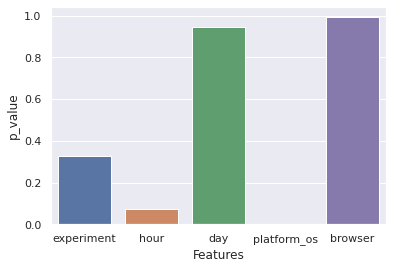

In [154]:
plot_stat(z_scores,p_values,x_train)

In [128]:

def prediction(model):
  predicted=model.predict(X_test)
  return metrics.confusion_matrix(Y_test,predicted)

In [129]:
prediction(Regression_model)

array([[65,  5],
       [51,  4]])

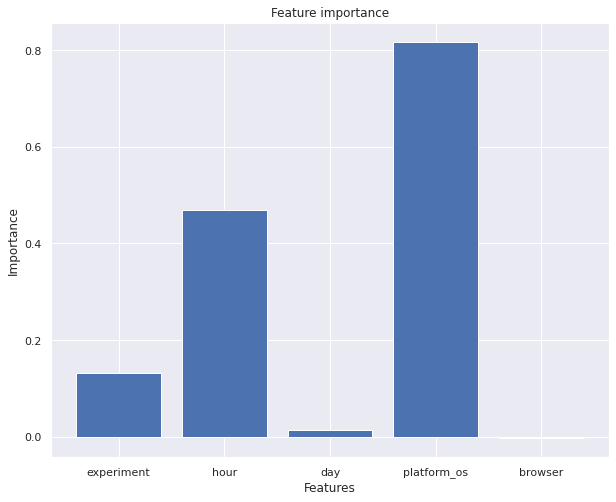

In [132]:
plt.figure(figsize=(10,8))
plt.title("Feature importance")
plt.xlabel("Features")
plt.ylabel("Importance")

features=(Regression_model.coef_[0])
plt.bar(x_train.columns,features)
plt.show()

In [134]:
XGBData=xgb.DMatrix(data=X_train,label=Y_train)

Xgb_model=xgb.XGBClassifier()

Xgb_model.fit(x_train, x_val)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [135]:
accuracy= cross_val_score(Xgb_model,y_train,y_val, cv=5,scoring='accuracy').mean()*100
print("Accuracyof the logistic XGBoost is:%.2f"%accuracy)

Accuracyof the logistic Regression model is:44.74


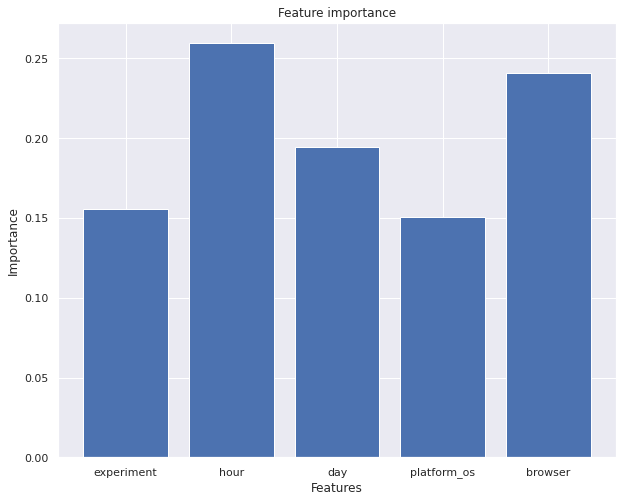

In [138]:
plt.figure(figsize=(10,8))
plt.title("Feature importance")
plt.xlabel("Features")
plt.ylabel("Importance")

features=(Xgb_model.feature_importances_)
plt.bar(x_train.columns,features)
plt.show()